In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [12]:
!mkdir .kaggle
!touch .kaggle/kaggle.json
!chmod 600 .kaggle/kaggle.json

A subdirectory or file .kaggle already exists.
'touch' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
!kaggle datasets download -d omkargurav/face-mask-dataset


  0%|          | 0.00/163M [00:00<?, ?B/s]
  1%|          | 1.00M/163M [00:01<03:08, 904kB/s]
  1%|1         | 2.00M/163M [00:01<01:34, 1.78MB/s]
  2%|1         | 3.00M/163M [00:01<00:59, 2.84MB/s]
  2%|2         | 4.00M/163M [00:01<00:43, 3.88MB/s]
  3%|3         | 5.00M/163M [00:01<00:34, 4.87MB/s]
  4%|3         | 6.00M/163M [00:01<00:28, 5.73MB/s]
  4%|4         | 7.00M/163M [00:01<00:25, 6.43MB/s]
  5%|4         | 8.00M/163M [00:02<00:25, 6.32MB/s]
  6%|5         | 9.00M/163M [00:02<00:22, 7.07MB/s]
  6%|6         | 10.0M/163M [00:02<00:21, 7.43MB/s]
  7%|6         | 11.0M/163M [00:02<00:21, 7.54MB/s]
  7%|7         | 12.0M/163M [00:02<00:19, 7.95MB/s]
  8%|7         | 13.0M/163M [00:02<00:19, 8.08MB/s]
  9%|8         | 14.0M/163M [00:02<00:20, 7.61MB/s]
  9%|9         | 15.0M/163M [00:02<00:19, 7.83MB/s]
 10%|9         | 16.0M/163M [00:03<00:19, 7.91MB/s]
 11%|#1        | 18.0M/163M [00:03<00:16, 9.13MB/s]
 12%|#1        | 19.0M/163M [00:03<00:16, 8.94MB/s]
 13%|#2        | 21.0

In [17]:
from zipfile import ZipFile
dataset = 'face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
with_mask_files = os.listdir('data/with_mask/')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [3]:
without_mask_files = os.listdir('data/without_mask/')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [4]:
print("No of with mask images: ", len(with_mask_files))
print("No of without mask images: ", len(without_mask_files))

No of with mask images:  3725
No of without mask images:  3828


In [5]:
# Creating labels for the two class of images
# with mask -> 1
# without mask -> 0

In [6]:
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [7]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


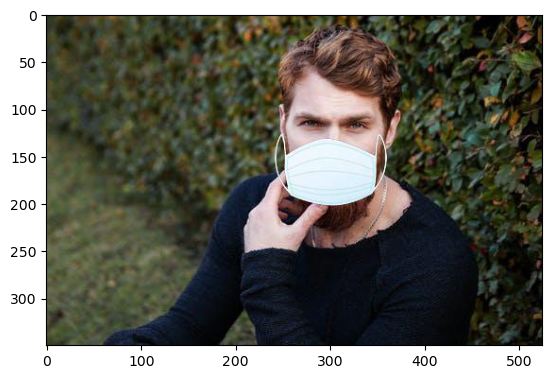

In [8]:
img = mpimg.imread('data/with_mask/with_mask_1.jpg')
impplt = plt.imshow(img)

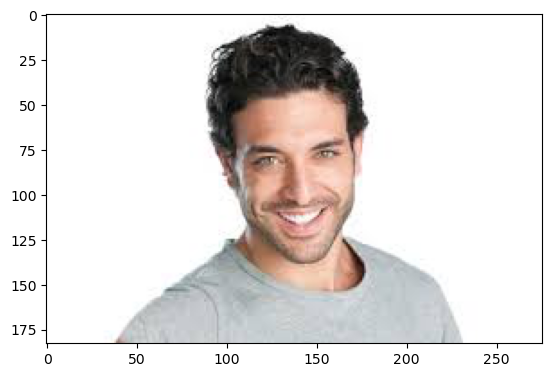

In [9]:
img = mpimg.imread('data/without_mask/without_mask_1000.jpg')
impplt = plt.imshow(img)

In [10]:
#Image Processing

In [11]:
# 1. Resize the image
# 2. Convert the images into numpy arrays

In [12]:
with_mask_path = 'data/with_mask/'

data = []

for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

without_mask_path = 'data/without_mask/'

for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

C:\Users\ashis\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
type(data)

list

In [14]:
len(data)

7553

In [15]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [16]:
data[0].shape

(128, 128, 3)

In [17]:
#Converting data list and label list into numpy array

X = np.array(data)
Y = np.array(labels)

In [18]:
print(X.shape)

(7553, 128, 128, 3)


In [19]:
print(Y)

[1 1 1 ... 0 0 0]


In [20]:
#Train-test split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [23]:
#Scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [24]:
#Building a CNN

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
number_of_classes = 2 #withmask and withoutmask- output of NN

model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape= (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5)) #to avoid overfitting

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(number_of_classes, activation='sigmoid'))

In [27]:
#compiling the neural network

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [28]:
#training the neural network

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs= 5)

Epoch 1/5
170/170 [==============================] - 777s 5s/step - loss: 0.4838 - acc: 0.7901 - val_loss: 0.2792 - val_acc: 0.8810
Epoch 2/5
170/170 [==============================] - 838s 5s/step - loss: 0.3049 - acc: 0.8830 - val_loss: 0.2354 - val_acc: 0.9025
Epoch 3/5
170/170 [==============================] - 820s 5s/step - loss: 0.2554 - acc: 0.8970 - val_loss: 0.2261 - val_acc: 0.9107
Epoch 4/5
170/170 [==============================] - 802s 5s/step - loss: 0.2178 - acc: 0.9113 - val_loss: 0.2146 - val_acc: 0.9207
Epoch 5/5
170/170 [==============================] - 778s 5s/step - loss: 0.1758 - acc: 0.9305 - val_loss: 0.2353 - val_acc: 0.9074


In [29]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Accuracy: ", accuracy)

48/48 [==============================] - 62s 1s/step - loss: 0.2117 - acc: 0.9153
Test Accuracy:  0.9152879118919373


In [30]:
#PREDICTING AN IMAGE

1/1 [==============================] - 0s 63ms/step
[[0.44519374 0.5789784 ]]
The person in image has mask


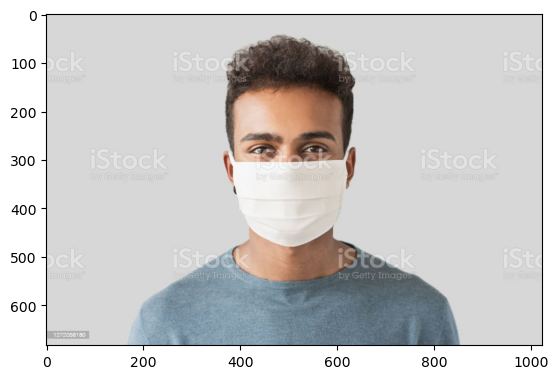

In [50]:
input_image_path = "pic_with_mask.jpg"

input_image = mpimg.imread(input_image_path)

imgplt = plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, (1,128,128,3))

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_prediction_label = np.argmax(input_prediction)

if input_prediction_label==1:
    print("The person in image has mask")
    
else:
    print("The person in image does not have mask") 